In [ ]:
pip install PySastrawi

In [ ]:
import pandas as pd
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm


import nltk
import string
import re

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
#Koneksi ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/My Drive/Sempro&Skripsi/PDA/detikreal.xlsx')
df

,Judul,Sentimen
0,"Gandeng Startup, Suzuki Bikin Taksi Terbang da...",Positif
1,Badan Otorita IKN Sebut Proyek Triliunan Seger...,Netral
2,Menteri Basuki: Progres IKN Sudah 40 Persen-Bu...,Positif
3,Badan Otorita Pede Presiden Berikutnya Teruska...,Positif
4,Proyek Belasan Triliun Rupiah Bakal Groundbrea...,Netral
...,...,...
1989,Kapan Ibu Kota Negara Pindah ke Kaltim? Ini Ja...,Netral
1990,Draf RUU IKN: Tidak Ada Otonomi Daerah di Ibu ...,Netral
1991,"Jubir Jokowi: RUU IKN Segera Dikirim ke DPR, I...",Netral
1992,Baleg DPR Sebut Presiden Ingin Pembahasan RUU ...,Netral


In [ ]:
df.isnull().sum()

Judul       0
Sentimen    0
dtype: int64

In [ ]:
#Cleansing Data
def cleansing(text):
    #Menghilangkan tanda kurung
    text = re.sub('\[.*?\]', '', text)
    #Mengubah - menjadi spasi
    text = re.sub('-',' ', text)
    #Menghilangkan Tanda Baca
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    #Menghilangkan Special Karakter
    text = re.sub('\w*\d\w*', '', text)
    #Menghilangkan Single Character
    text = re.sub('\s+[a-zA-Z]\s+', '', text)
    #Menghilangkan Link
    text = re.sub(r"http\S+", "", text, flags=re.MULTILINE)
    #Menghilangkan Hashtag
    text = re.sub(r'\B#\S+','', text)
    #Mengganti Multiple Spaces ke Single Spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    #Menghilangkan Spaces di awal
    text = text.strip()
    return text
df['CLEANSING']= df['Judul'].apply(lambda x: cleansing(x))
df.head()

,Judul,Sentimen,CLEANSING
0,"Gandeng Startup, Suzuki Bikin Taksi Terbang da...",Positif,Gandeng Startup Suzuki Bikin Taksi Terbang dan...
1,Badan Otorita IKN Sebut Proyek Triliunan Seger...,Netral,Badan Otorita IKN Sebut Proyek Triliunan Seger...
2,Menteri Basuki: Progres IKN Sudah 40 Persen-Bu...,Positif,Menteri Basuki Progres IKN Sudah Persen Bulan ...
3,Badan Otorita Pede Presiden Berikutnya Teruska...,Positif,Badan Otorita Pede Presiden Berikutnya Teruska...
4,Proyek Belasan Triliun Rupiah Bakal Groundbrea...,Netral,Proyek Belasan Triliun Rupiah Bakal Groundbrea...


In [ ]:
#CaseFolding / Menghilangkan huruf kapital
def case_folding(text):
    text = text.lower()
    return text
df['CASEFOLDING']= df['CLEANSING'].apply(lambda x: case_folding(x))
df.head()

,Judul,Sentimen,CLEANSING,CASEFOLDING
0,"Gandeng Startup, Suzuki Bikin Taksi Terbang da...",Positif,Gandeng Startup Suzuki Bikin Taksi Terbang dan...,gandeng startup suzuki bikin taksi terbang dan...
1,Badan Otorita IKN Sebut Proyek Triliunan Seger...,Netral,Badan Otorita IKN Sebut Proyek Triliunan Seger...,badan otorita ikn sebut proyek triliunan seger...
2,Menteri Basuki: Progres IKN Sudah 40 Persen-Bu...,Positif,Menteri Basuki Progres IKN Sudah Persen Bulan ...,menteri basuki progres ikn sudah persen bulan ...
3,Badan Otorita Pede Presiden Berikutnya Teruska...,Positif,Badan Otorita Pede Presiden Berikutnya Teruska...,badan otorita pede presiden berikutnya teruska...
4,Proyek Belasan Triliun Rupiah Bakal Groundbrea...,Netral,Proyek Belasan Triliun Rupiah Bakal Groundbrea...,proyek belasan triliun rupiah bakal groundbrea...


In [ ]:
#Tokenizing
#Tokenization
# Pemisahan Per Kata

def tokenization(text):
    text = re.split('\W+', text)
    return text
df['TOKENIZATION']= df['CASEFOLDING'].apply(lambda x: tokenization(x))
df.head()

,Judul,Sentimen,CLEANSING,CASEFOLDING,TOKENIZATION
0,"Gandeng Startup, Suzuki Bikin Taksi Terbang da...",Positif,Gandeng Startup Suzuki Bikin Taksi Terbang dan...,gandeng startup suzuki bikin taksi terbang dan...,"[gandeng, startup, suzuki, bikin, taksi, terba..."
1,Badan Otorita IKN Sebut Proyek Triliunan Seger...,Netral,Badan Otorita IKN Sebut Proyek Triliunan Seger...,badan otorita ikn sebut proyek triliunan seger...,"[badan, otorita, ikn, sebut, proyek, triliunan..."
2,Menteri Basuki: Progres IKN Sudah 40 Persen-Bu...,Positif,Menteri Basuki Progres IKN Sudah Persen Bulan ...,menteri basuki progres ikn sudah persen bulan ...,"[menteri, basuki, progres, ikn, sudah, persen,..."
3,Badan Otorita Pede Presiden Berikutnya Teruska...,Positif,Badan Otorita Pede Presiden Berikutnya Teruska...,badan otorita pede presiden berikutnya teruska...,"[badan, otorita, pede, presiden, berikutnya, t..."
4,Proyek Belasan Triliun Rupiah Bakal Groundbrea...,Netral,Proyek Belasan Triliun Rupiah Bakal Groundbrea...,proyek belasan triliun rupiah bakal groundbrea...,"[proyek, belasan, triliun, rupiah, bakal, grou..."


In [ ]:
# read txt stopword using pandas  atau Menggunakan Stopwords
txt_stopword = pd.read_csv("/content/drive/My Drive/Sempro&Skripsi/PDA/stopwordbahasa.csv")

# convert stopword string to list & append additional stopword
list_stopwords = txt_stopword.values.tolist()

# ---------------------------------------------------------------------------------------

# convert list to dictionary
#dict_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['STOP REMOVAL'] = df['TOKENIZATION'].apply(stopwords_removal)


print(df['STOP REMOVAL'].head())


0    [gandeng, startup, suzuki, bikin, taksi, terba...
1    [badan, otorita, ikn, sebut, proyek, triliunan...
2    [menteri, basuki, progres, ikn, sudah, persen,...
3    [badan, otorita, pede, presiden, berikutnya, t...
4    [proyek, belasan, triliun, rupiah, bakal, grou...
Name: STOP REMOVAL, dtype: object


In [ ]:
#StopwordRemoval atau memfilter kata-kata penting

final = pd.DataFrame(df, columns= ['Sentimen', 'STOP REMOVAL'])
final

,Sentimen,STOP REMOVAL
0,Positif,"[gandeng, startup, suzuki, bikin, taksi, terba..."
1,Netral,"[badan, otorita, ikn, sebut, proyek, triliunan..."
2,Positif,"[menteri, basuki, progres, ikn, sudah, persen,..."
3,Positif,"[badan, otorita, pede, presiden, berikutnya, t..."
4,Netral,"[proyek, belasan, triliun, rupiah, bakal, grou..."
...,...,...
1989,Netral,"[kapan, ibu, kota, negara, pindah, ke, kaltim,..."
1990,Netral,"[draf, ruu, ikn, tidak, ada, otonomi, daerah, ..."
1991,Netral,"[jubir, jokowi, ruu, ikn, segera, dikirim, ke,..."
1992,Netral,"[baleg, dpr, sebut, presiden, ingin, pembahasa..."


In [ ]:
pip install swifter

In [ ]:
#Stemming atau pemotongan imbuhan

import swifter
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in final['STOP REMOVAL']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

final['STEMMING'] = final['STOP REMOVAL'].apply(get_stemmed_term)

3318
------------------------
gandeng : gandeng
startup : startup
suzuki : suzuki
bikin : bikin
taksi : taksi
terbang : terbang
dan : dan
minat : minat
masuk : masuk
ikn : ikn
badan : badan
otorita : otorita
sebut : sebut
proyek : proyek
triliunan : triliun
segera : segera
groundbreaking : groundbreaking
menteri : menteri
basuki : basuki
progres : progres
sudah : sudah
persen : persen
bulan : bulan
depan : depan
bangun : bangun
bandara : bandara
vvip : vvip
pede : pede
presiden : presiden
berikutnya : ikut
teruskan : terus
pembangunan : bangun
belasan : bas
triliun : triliun
rupiah : rupiah
bakal : bakal
di : di
minggu : minggu
investor : investor
jepang : jepang
tinjau : tinjau
begini : begini
terbarunya : baru
fakta : fakta
tol : tol
penyambung : sambung
pertama : pertama
kalimantan : kalimantan
pangkas : pangkas
waktu : waktu
jam : jam
serba : serba
serbi : serbi
pembangunannya : bangun
raja : raja
properti : properti
sydney : sydney
kelahiran : lahir
ri : ri
investasi : investasi
d

In [ ]:
final.head()

,Sentimen,STOP REMOVAL,STEMMING
0,Positif,"[gandeng, startup, suzuki, bikin, taksi, terba...","[gandeng, startup, suzuki, bikin, taksi, terba..."
1,Netral,"[badan, otorita, ikn, sebut, proyek, triliunan...","[badan, otorita, ikn, sebut, proyek, triliun, ..."
2,Positif,"[menteri, basuki, progres, ikn, sudah, persen,...","[menteri, basuki, progres, ikn, sudah, persen,..."
3,Positif,"[badan, otorita, pede, presiden, berikutnya, t...","[badan, otorita, pede, presiden, ikut, terus, ..."
4,Netral,"[proyek, belasan, triliun, rupiah, bakal, grou...","[proyek, bas, triliun, rupiah, bakal, groundbr..."


In [ ]:
#MEMBACA KAMUS KBBA untuk Proses Normalisasi

kbba = pd.read_csv('/content/drive/My Drive/Sempro&Skripsi/PDA/slang.csv')

In [ ]:
#Normalisasi

normalizad_word_dict = {}

for index, row in kbba.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

final['NORMALISASI'] = final['STEMMING'].apply(normalized_term)

final['NORMALISASI'].head(10)

0    [gandeng, startup, suzuki, bikin, taksi, terba...
1    [badan, otorita, ikn, sebut, proyek, triliun, ...
2    [menteri, basuki, progres, ikn, sudah, persen,...
3    [badan, otorita, percaya diri, presiden, ikut,...
4    [proyek, bas, triliun, rupiah, akan, groundbre...
5    [investor, jepang, tinjau, bangun, ikn, begini...
6    [fakta, tol, sambung, ikn, pertama, di, kalima...
7    [serba, serbi, bandara, vvip, ikn, dan, progre...
8    [raja, properti, sydney, lahir, ri, minat, inv...
9        [ikn, akan, lengkap, jaring, internet, cepat]
Name: NORMALISASI, dtype: object

In [ ]:
def fit_normalisasi(text):
    text = np.array(text)
    text = ' '.join(text)

    return text
final['NORMALISASI'] = final['NORMALISASI'].apply(lambda x: fit_normalisasi(x))
final.head()

,Sentimen,STOP REMOVAL,STEMMING,NORMALISASI
0,Positif,"[gandeng, startup, suzuki, bikin, taksi, terba...","[gandeng, startup, suzuki, bikin, taksi, terba...",gandeng startup suzuki bikin taksi terbang dan...
1,Netral,"[badan, otorita, ikn, sebut, proyek, triliunan...","[badan, otorita, ikn, sebut, proyek, triliun, ...",badan otorita ikn sebut proyek triliun segera ...
2,Positif,"[menteri, basuki, progres, ikn, sudah, persen,...","[menteri, basuki, progres, ikn, sudah, persen,...",menteri basuki progres ikn sudah persen bulan ...
3,Positif,"[badan, otorita, pede, presiden, berikutnya, t...","[badan, otorita, pede, presiden, ikut, terus, ...",badan otorita percaya diri presiden ikut terus...
4,Netral,"[proyek, belasan, triliun, rupiah, bakal, grou...","[proyek, bas, triliun, rupiah, bakal, groundbr...",proyek bas triliun rupiah akan groundbreaking ...


In [ ]:
#SIMPAN HASIL NORMALISASI

final.to_excel("/content/drive/My Drive/Sempro&Skripsi/PDA/NewNorm.xlsx")

In [ ]:
#NORMALISASI NEGASI
def convert_negasi(text):
    text = re.sub("tidak ", 'tidak', text, flags=re.MULTILINE)
    text = re.sub("jangan ", 'jangan', text, flags=re.MULTILINE)
    text = re.sub("belum ", 'belum', text, flags=re.MULTILINE)
    text = re.sub("bukan ", 'bukan', text, flags=re.MULTILINE)
    text = re.sub("tanpa ", 'tanpa', text, flags=re.MULTILINE)
    text = re.sub("bukanlah ", 'bukanlah', text, flags=re.MULTILINE)
    text = re.sub("tak ", 'tak', text, flags=re.MULTILINE)
    text = re.sub("anti ", 'anti', text, flags=re.MULTILINE)
    return text
final['NORMALISASI']= final['NORMALISASI'].apply(lambda x: convert_negasi(x))
final

,Sentimen,STOP REMOVAL,STEMMING,NORMALISASI
0,Positif,"[gandeng, startup, suzuki, bikin, taksi, terba...","[gandeng, startup, suzuki, bikin, taksi, terba...",gandeng startup suzuki bikin taksi terbang dan...
1,Netral,"[badan, otorita, ikn, sebut, proyek, triliunan...","[badan, otorita, ikn, sebut, proyek, triliun, ...",badan otorita ikn sebut proyek triliun segera ...
2,Positif,"[menteri, basuki, progres, ikn, sudah, persen,...","[menteri, basuki, progres, ikn, sudah, persen,...",menteri basuki progres ikn sudah persen bulan ...
3,Positif,"[badan, otorita, pede, presiden, berikutnya, t...","[badan, otorita, pede, presiden, ikut, terus, ...",badan otorita percaya diri presiden ikut terus...
4,Netral,"[proyek, belasan, triliun, rupiah, bakal, grou...","[proyek, bas, triliun, rupiah, bakal, groundbr...",proyek bas triliun rupiah akan groundbreaking ...
...,...,...,...,...
1989,Netral,"[kapan, ibu, kota, negara, pindah, ke, kaltim,...","[kapan, ibu, kota, negara, pindah, ke, kaltim,...",kapan ibu kota negara pindah ke kaltim ini jaw...
1990,Netral,"[draf, ruu, ikn, tidak, ada, otonomi, daerah, ...","[draf, ruu, ikn, tidak, ada, otonomi, daerah, ...",draf ruu ikn tidakada otonomi daerah di ibu ko...
1991,Netral,"[jubir, jokowi, ruu, ikn, segera, dikirim, ke,...","[jubir, jokowi, ruu, ikn, segera, kirim, ke, d...",jubir jokowi ruu ikn segera kirim ke dpr insya...
1992,Netral,"[baleg, dpr, sebut, presiden, ingin, pembahasa...","[baleg, dpr, sebut, presiden, ingin, bahas, ru...",baleg dpr sebut presiden ingin bahas ruu ikn s...


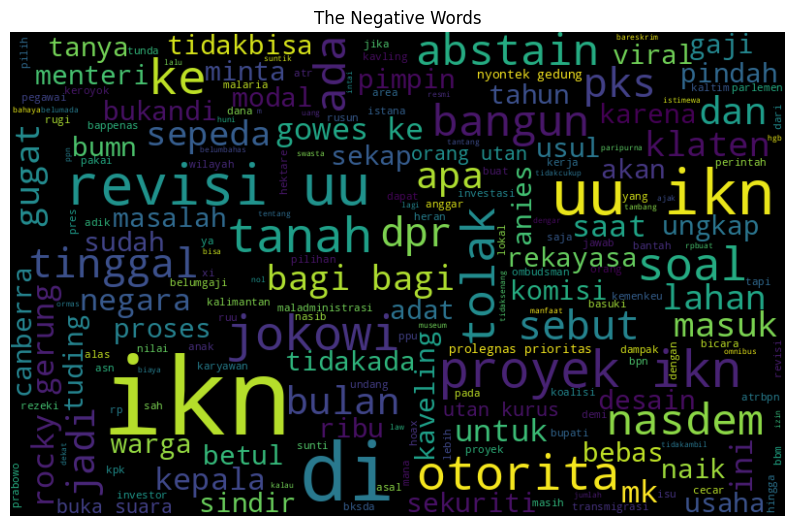

In [ ]:
from wordcloud import WordCloud


negative_words =' '.join([text for text in final['NORMALISASI'][final['Sentimen'] == 'Negatif']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

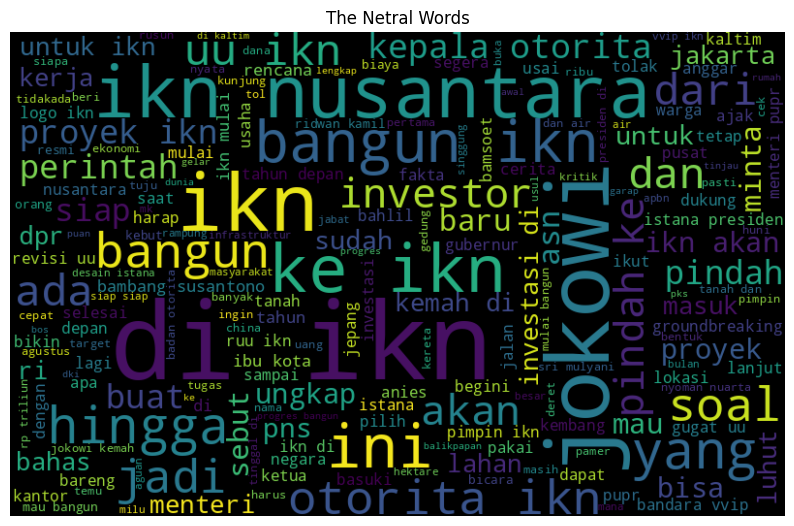

In [ ]:
from wordcloud import WordCloud

netral_words =' '.join([text for text in final['NORMALISASI'][final['Sentimen'] == 'Netral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(netral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Netral Words')
plt.show()

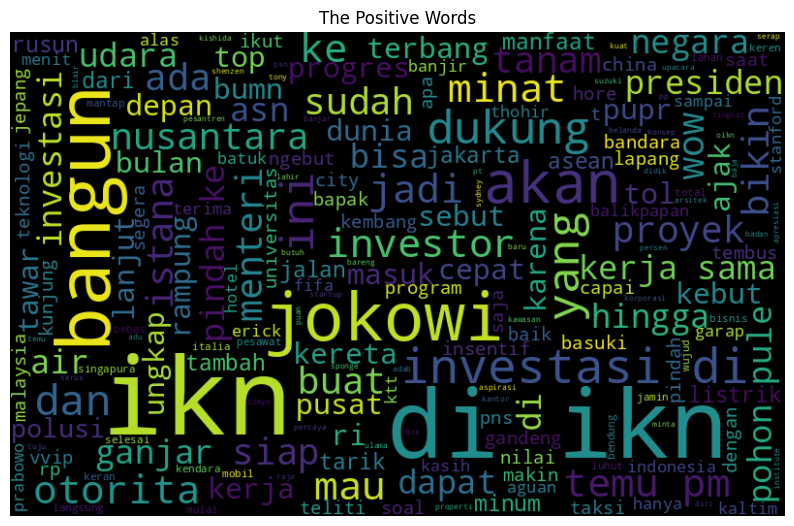

In [ ]:
from wordcloud import WordCloud

positif_words =' '.join([text for text in final['NORMALISASI'][final['Sentimen'] == 'Positif']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(positif_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [ ]:
#Merubah Sentimen ke Polarity
#Konversi Sentimen Ke Polaritas
def convert(polarity):
    if polarity == 'Positif':
        return 1
    elif polarity == 'Netral':
        return 0
    else:
        return -1

In [ ]:
final['Polarity'] = final['Sentimen'].apply(convert)
final

,Sentimen,STOP REMOVAL,STEMMING,NORMALISASI,Polarity
0,Positif,"[gandeng, startup, suzuki, bikin, taksi, terba...","[gandeng, startup, suzuki, bikin, taksi, terba...",gandeng startup suzuki bikin taksi terbang dan...,1
1,Netral,"[badan, otorita, ikn, sebut, proyek, triliunan...","[badan, otorita, ikn, sebut, proyek, triliun, ...",badan otorita ikn sebut proyek triliun segera ...,0
2,Positif,"[menteri, basuki, progres, ikn, sudah, persen,...","[menteri, basuki, progres, ikn, sudah, persen,...",menteri basuki progres ikn sudah persen bulan ...,1
3,Positif,"[badan, otorita, pede, presiden, berikutnya, t...","[badan, otorita, pede, presiden, ikut, terus, ...",badan otorita percaya diri presiden ikut terus...,1
4,Netral,"[proyek, belasan, triliun, rupiah, bakal, grou...","[proyek, bas, triliun, rupiah, bakal, groundbr...",proyek bas triliun rupiah akan groundbreaking ...,0
...,...,...,...,...,...
1989,Netral,"[kapan, ibu, kota, negara, pindah, ke, kaltim,...","[kapan, ibu, kota, negara, pindah, ke, kaltim,...",kapan ibu kota negara pindah ke kaltim ini jaw...,0
1990,Netral,"[draf, ruu, ikn, tidak, ada, otonomi, daerah, ...","[draf, ruu, ikn, tidak, ada, otonomi, daerah, ...",draf ruu ikn tidakada otonomi daerah di ibu ko...,0
1991,Netral,"[jubir, jokowi, ruu, ikn, segera, dikirim, ke,...","[jubir, jokowi, ruu, ikn, segera, kirim, ke, d...",jubir jokowi ruu ikn segera kirim ke dpr insya...,0
1992,Netral,"[baleg, dpr, sebut, presiden, ingin, pembahasa...","[baleg, dpr, sebut, presiden, ingin, bahas, ru...",baleg dpr sebut presiden ingin bahas ruu ikn s...,0


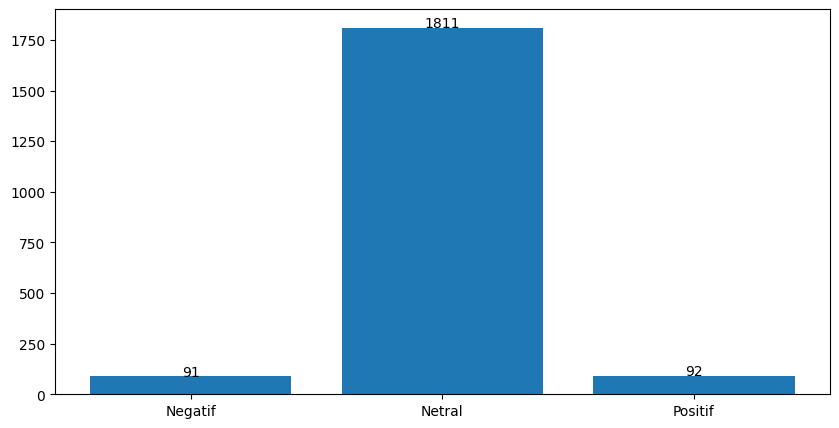

In [ ]:
r=final
import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.figure(figsize=(10,5))
Category_count=r.groupby('Sentimen').count()
barx = Category_count.index.values
bary = Category_count['NORMALISASI']
plt.bar(barx, bary)
addlabels(barx,bary)
plt.show()

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(final['NORMALISASI'],final['Polarity'], test_size=0.2, random_state=30)
print(Train_X.shape)
print(Test_X.shape)
print(Train_Y.shape)
print(Test_Y.shape)

(1595,)
(399,)
(1595,)
(399,)


In [ ]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(final['NORMALISASI'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
Train_X_Tfidf.shape

(1595, 2674)

In [ ]:
print(Train_X_Tfidf)

  (0, 1921)	0.3004399736112016
  (0, 1620)	0.2247405940384115
  (0, 1409)	0.26964824437929547
  (0, 1321)	0.3710243499908396
  (0, 1197)	0.28804948410533043
  (0, 852)	0.2053968108197358
  (0, 830)	0.34141951889538985
  (0, 827)	0.06308330680810911
  (0, 821)	0.31948019712935793
  (0, 517)	0.12303599476998292
  (0, 208)	0.2704937405095307
  (0, 192)	0.17297886404885987
  (0, 157)	0.34141951889538985
  (0, 12)	0.2574680673090294
  (1, 2043)	0.40891505823578145
  (1, 1409)	0.2685289759697368
  (1, 1397)	0.3889393918412921
  (1, 1327)	0.30954786092222697
  (1, 1243)	0.29652325396722157
  (1, 1111)	0.3349814952078918
  (1, 900)	0.2369902207836023
  (1, 827)	0.06282145769930685
  (1, 307)	0.32600519995992666
  (1, 226)	0.3834814239501166
  (2, 2301)	0.3578137409691561
  :	:
  (1592, 916)	0.3145240221156772
  (1592, 852)	0.20996017681952678
  (1592, 827)	0.06448484861537289
  (1592, 517)	0.12576952443406597
  (1592, 208)	0.2765033856139077
  (1593, 1874)	0.3805819431460681
  (1593, 1820)	0.3

In [ ]:
print(Test_X_Tfidf)

  (0, 2666)	0.24245379627331248
  (0, 2067)	0.35152788055309664
  (0, 1505)	0.2885773933933783
  (0, 1181)	0.46965516825614567
  (0, 852)	0.2191284580782517
  (0, 827)	0.06730069321022776
  (0, 517)	0.1312614724370377
  (0, 409)	0.43807112873906445
  (0, 192)	0.18454323418108343
  (0, 39)	0.46696108950284215
  (1, 2316)	0.3784332150648457
  (1, 2302)	0.34206243050071694
  (1, 1579)	0.15959717706973345
  (1, 1136)	0.366724437680557
  (1, 1046)	0.2939828685522995
  (1, 1007)	0.2514317783686531
  (1, 831)	0.3571576699730225
  (1, 827)	0.05255091509941986
  (1, 517)	0.1024938996143256
  (1, 216)	0.366724437680557
  (1, 204)	0.3935284545371513
  (2, 2151)	0.3748009532922821
  (2, 2006)	0.3748009532922821
  (2, 1844)	0.3825348322011096
  (2, 1620)	0.2342797613131195
  :	:
  (396, 1826)	0.5260774935128726
  (396, 1746)	0.4564219643625986
  (396, 1315)	0.43547729117753176
  (396, 965)	0.22139596135027995
  (396, 951)	0.5186950731972801
  (396, 827)	0.0849719922911846
  (397, 2150)	0.2864751726

In [ ]:
hyperparameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svm = SVC()
svm_tuned = GridSearchCV(svm, hyperparameters)

In [ ]:
svm_tuned.fit(Train_X_Tfidf, Train_Y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [ ]:
svm = SVC(C=1, kernel='linear', degree=3, gamma='scale')
svm.fit(Train_X_Tfidf,Train_Y)

SVC(C=1, kernel='linear')

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [ ]:
predict_test = svm.predict(Test_X_Tfidf)
confusion_matrix(Test_Y,predict_test)

array([[  1,  13,   0],
       [  0, 372,   0],
       [  0,  13,   0]])

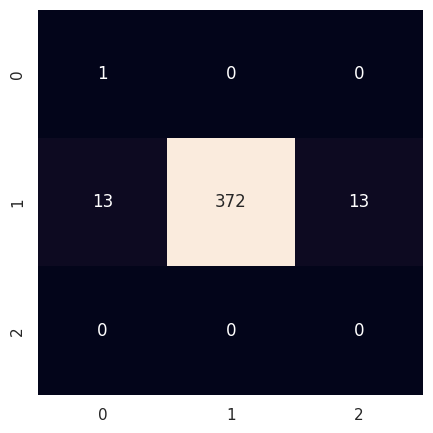

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
plt.figure(figsize=(15,5))
svc_lin= confusion_matrix(Test_Y,predict_test)
sns.heatmap(svc_lin.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
print(classification_report(Test_Y,predict_test))

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.93      1.00      0.97       372
           2       0.00      0.00      0.00        13

    accuracy                           0.93       399
   macro avg       0.64      0.36      0.37       399
weighted avg       0.91      0.93      0.91       399



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svc_df=pd.DataFrame({'y_test':Test_Y,'y_pred':predict_test})
svc_df.head()

,y_test,y_pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [ ]:
svc_df.groupby(['y_test','y_pred'])['y_pred'].count()

y_test  y_pred
0       0           1
        1          13
1       1         372
2       1          13
Name: y_pred, dtype: int64

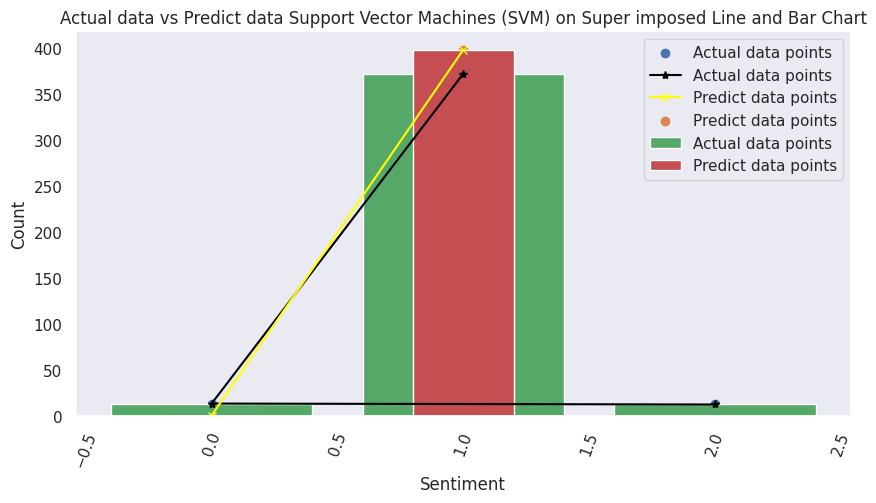

In [ ]:
actual_nb=svc_df['y_test'].value_counts()
predict_nb=svc_df['y_pred'].value_counts()
plt.figure(figsize=(10,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Support Vector Machines (SVM) on Super imposed Line and Bar Chart")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
print('Accuracy Score :',accuracy_score(Test_Y,predict_test)*100)
print('recall Score :',recall_score(Test_Y,predict_test, average='weighted')*100)
print('precision Score :',precision_score(Test_Y,predict_test, average='weighted')*100)
print('f1 Score :',f1_score(Test_Y,predict_test, average='weighted')*100)

Accuracy Score : 93.48370927318295
recall Score : 93.48370927318295
precision Score : 90.6512512436871
f1 Score : 90.55278889865357


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
the_X = final['NORMALISASI']
the_Y = final['Polarity']

In [ ]:
tfid = TfidfVectorizer()
main_X =  tfid.fit_transform(the_X)

<1994x2674 sparse matrix of type '<class 'numpy.float64'>'
	with 19220 stored elements in Compressed Sparse Row format>

In [ ]:
smote = SMOTE(random_state = 30)
x_sm,y_sm = smote.fit_resample(main_X, the_Y)

In [ ]:
trainX , testX , trainY , testY = train_test_split(x_sm , y_sm , test_size=0.2)

In [ ]:
print("Before OverSampling, counts of label '2': {}".format(sum(Train_Y==2)))
print("Before OverSampling, counts of label '1': {}".format(sum(Train_Y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Train_Y==0)))

print('After OverSampling, the shape of Train_X: {}'.format(x_sm.shape))
print('After OverSampling, the shape of Train_Y: {} \n'.format(y_sm.shape))

print("After OverSampling, counts of label '2': {}".format(sum(y_sm==1)))
print("After OverSampling, counts of label '1': {}".format(sum(y_sm==0)))
print("After OverSampling, counts of label '0': {}".format(sum(y_sm==-1)))

Before OverSampling, counts of label '2': 79
Before OverSampling, counts of label '1': 1439
Before OverSampling, counts of label '0': 77 

After OverSampling, the shape of Train_X: (5433, 2674)
After OverSampling, the shape of Train_Y: (5433,) 

After OverSampling, counts of label '2': 1811
After OverSampling, counts of label '1': 1811
After OverSampling, counts of label '0': 1811


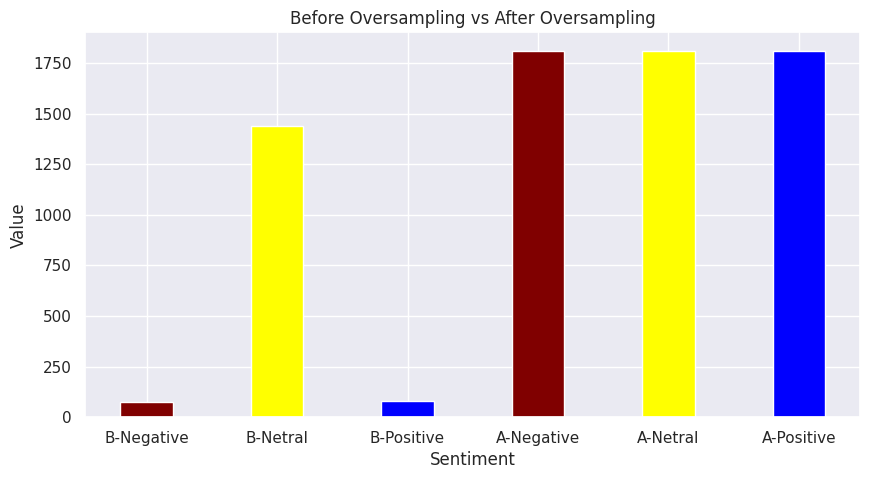

In [ ]:
compare = {'B-Negative':77, 'B-Netral':1439, 'B-Positive':79,
        'A-Negative':1811, 'A-Netral':1811, 'A-Positive':1811}
sentimen = list(compare.keys())
values = list(compare.values())
warna = ['maroon', 'yellow', 'blue', 'maroon', 'yellow', 'blue']

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(sentimen, values, color = warna, width = 0.4)

plt.xlabel("Sentiment")
plt.ylabel("Value")
plt.title("Before Oversampling vs After Oversampling")
plt.show()

In [ ]:
svm_tuned.fit(trainX, trainY)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [ ]:
svm = SVC(C=1, kernel='linear', degree=3, gamma='scale')
svm.fit(trainX, trainY)

SVC(C=1, kernel='linear')

In [ ]:
svm_prediction =  svm.predict(testX)

In [ ]:
print("SVM-SMOTE Accuracy Score = ", accuracy_score(svm_prediction, testY)*100)
print("SVM-SMOTE Precision Score = ", recall_score(svm_prediction, testY, average='weighted')*100)
print("SVM-SMOTE Recall Score = ", precision_score(svm_prediction, testY, average='weighted')*100)
print("SVM-SMOTE f1 Score = ", f1_score(svm_prediction, testY, average='weighted')*100)

SVM-SMOTE Accuracy Score =  98.98804047838087
SVM-SMOTE Precision Score =  98.98804047838087
SVM-SMOTE Recall Score =  99.01879062959028
SVM-SMOTE f1 Score =  98.99178272272414


https://medium.com/thecyphy/handling-data-imbalance-in-multi-label-classification-mlsmote-531155416b87
https://machinelearningmastery.com/multi-class-imbalanced-classification/